In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


# Exercise 1: Calculating a Confidence Interval for One Variance (Chi-Square)
- Task: Write a function that calculates a confidence interval for the variance of a single sample using the chi-square distribution.
- Input: A list of sample values and a confidence level.
- Output: A tuple representing the lower and upper bounds of the confidence interval for the variance.

- Hint: Use the chi-square distribution with degrees of freedom n−1 to find critical values.

The $100(1-\alpha)\% $ confidence interval for the population variance sigma^2 is given by:

$$
\left( \frac{(n-1)s^2}{\chi^2_{\alpha/2, n-1}}, \frac{(n-1)s^2}{\chi^2_{1-\alpha/2, n-1}} \right)
$$

where $\chi^2_{\alpha/2, n-1}$ and $\chi^2_{1-\alpha/2, n-1}$ are the critical values from the chi-square distribution with $n-1$ degrees of freedom.


In [4]:
def one_sample_chi_square_interval(sample, confidence_level):
    n = len(sample)
    s_squared = np.var(sample, ddof=1)
    alpha = 1 - confidence_level
    lower_critical_value = stats.chi2.ppf(alpha/2, df=n-1)
    upper_critical_value = stats.chi2.ppf(1-alpha/2, df=n-1)
    lower_bound = (n-1) * s_squared / upper_critical_value
    upper_bound = (n-1) * s_squared / lower_critical_value
    return lower_bound, upper_bound

# Generate sample data from a normal distribution with known parameters
np.random.seed(42)  # For reproducibility
true_mean = 10
true_variance = 4
sample_size = 10000
sample_data = np.random.normal(true_mean, np.sqrt(true_variance), sample_size)

# Calculate confidence interval using our function
confidence_level = 0.95
our_ci = one_sample_chi_square_interval(sample_data, confidence_level)

print(f"True variance: {true_variance}")
print(f"\nOur calculated 95% CI for variance: ({our_ci[0]:.4f}, {our_ci[1]:.4f})")


True variance: 4

Our calculated 95% CI for variance: (3.9184, 4.1418)


# Exercise 2: Simulating One-Sample Variance Intervals
- Task: Generate a sample from a normal distribution with a known variance, then calculate a 95% confidence interval for the sample variance. Repeat this for multiple samples and count the proportion of intervals that contain the true variance.

- Input: Population mean, population variance, sample size, number of simulations.

- Output: The percentage of intervals that contain the true variance.

- Hint: This exercise demonstrates the coverage of the confidence interval for a single variance.

In [7]:
NUM_SIMULATIONS = 10000
SAMPLE_SIZE = 1000 
CONFIDENCE_LEVEL = 0.60

contained_count = 0
for _ in range(NUM_SIMULATIONS):
    sample_data = np.random.normal(true_mean, np.sqrt(true_variance), SAMPLE_SIZE)
    ci = one_sample_chi_square_interval(sample_data, CONFIDENCE_LEVEL)
    if ci[0] <= true_variance <= ci[1]:
        contained_count += 1

print(f"Percentage of intervals containing the true variance: {contained_count / NUM_SIMULATIONS:.2%}")


Percentage of intervals containing the true variance: 59.88%


# Exercise 3: Visualizing the Effect of Sample Size on Variance Interval Width
- Task: Generate samples of increasing sizes from a normal distribution with a fixed variance. For each sample size, calculate a 95% confidence interval for the variance and plot the interval width as a function of sample size.

- Input: Population mean, population variance, range of sample sizes, confidence level.

- Output: A plot showing sample size on the x-axis and interval width on the y-axis.

- Hint: Larger sample sizes should reduce the interval width.

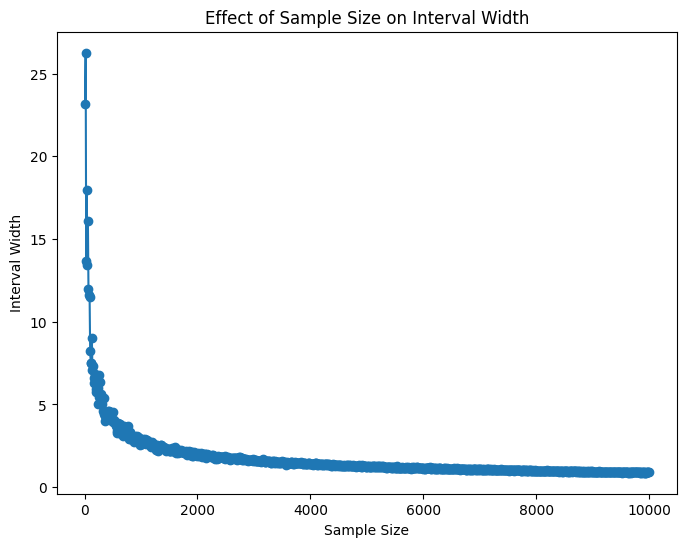

In [12]:
MAX_SAMPLE_SIZE = 10000
SAMPLE_SIZES = np.arange(10, MAX_SAMPLE_SIZE, 10)
CONFIDENCE_LEVEL = 0.95
POP_MEAN = 10
POP_STD = 4

interval_widths = []
for sample_size in SAMPLE_SIZES:
    sample_data = np.random.normal(POP_MEAN, POP_STD, sample_size)
    ci = one_sample_chi_square_interval(sample_data, CONFIDENCE_LEVEL)
    interval_widths.append(ci[1] - ci[0])

plt.figure(figsize=(8, 6))
plt.plot(SAMPLE_SIZES, interval_widths, marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Interval Width')
plt.title('Effect of Sample Size on Interval Width')
plt.show()


# Exercise 4: Introduction to the F-Distribution
- Task: Generate and plot the probability density function of the F-distribution for different degrees of freedom. Use this plot to explore how the shape of the distribution changes with varying parameters.

- Input: A range of values for numerator and denominator degrees of freedom.

- Output: A plot of the F-distribution for different degrees of freedom.`

- Hint: Use scipy.stats.f.pdf to calculate the density of the F-distribution.

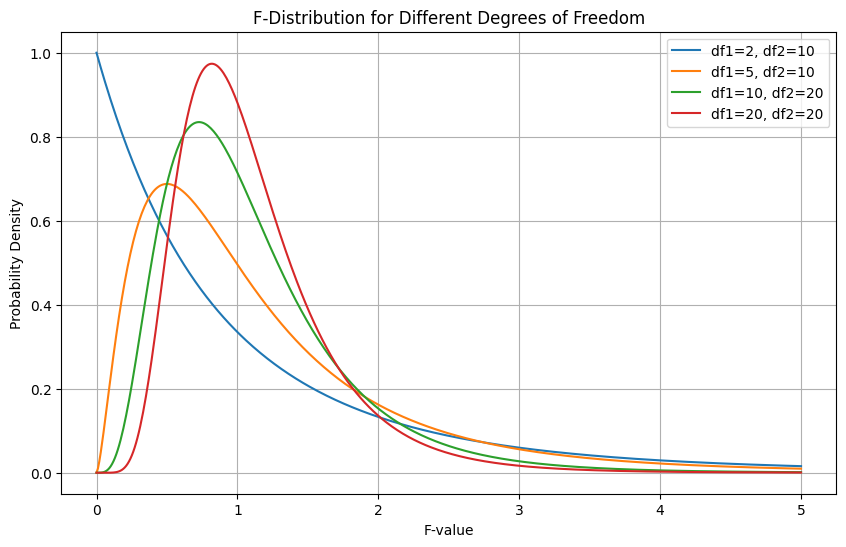

In [15]:
# Range of F-values for plotting
x = np.linspace(0, 5, 500)

# Degrees of freedom for the F-distribution (numerator, denominator)
degree_pairs = [(2, 10), (5, 10), (10, 20), (20, 20)]

# Plot the F-distribution for each pair of degrees of freedom
plt.figure(figsize=(10, 6))
for d1, d2 in degree_pairs:
    # Calculate the PDF of the F-distribution
    y = stats.f.pdf(x, d1, d2)
    plt.plot(x, y, label=f'df1={d1}, df2={d2}')

# Add plot labels and legend
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.title('F-Distribution for Different Degrees of Freedom')
plt.legend()
plt.grid(True)
plt.show()

# Exercise 5: Calculating an F-Interval for Two Variances
-  Task: Write a function that calculates a confidence interval for the ratio of two variances using the F-distribution.

- Input: Two lists of sample values and a confidence level.

- Output: A tuple representing the lower and upper bounds of the confidence interval for the variance ratio.

- Hint: Use the F-distribution with appropriate degrees of freedom for the two samples.

The $100(1-\alpha)\% $ confidence interval for the ratio of two variances $\frac{\sigma_1^2} {\sigma_2^2}$ is given by:


$$
\left( \frac{s_1^2}{s_2^2} \cdot \frac{1}{F_{1-\alpha/2, n_1-1, n_2-1}}, \frac{s_1^2}{s_2^2} \cdot \frac{1}{F_{\alpha/2, n_1-1, n_2-1}} \right)
$$


Where 
- $F_{1-\alpha/2, n_1-1, n_2-1}$ and $F_{\alpha/2, n_1-1, n_2-1}$ are the critical values from the F-distribution with - $n_1-1$ and $n_2-1$ degrees of freedom, 
- $s_1^2$ and $s_2^2$ are the sample variances, 
- $n_1$ and $n_2$ are the sample sizes.



In [18]:
def two_sample_f_interval(sample1, sample2, confidence_level):
    n1 = len(sample1)
    n2 = len(sample2)
    s1_squared = np.var(sample1, ddof=1)
    s2_squared = np.var(sample2, ddof=1)
    
    # Calculate the F statistic for the ratio of variances
    f = s1_squared / s2_squared
    
    # Set alpha
    alpha = 1 - confidence_level
    
    # Get critical values for the F-distribution
    lower_critical_value = stats.f.ppf(alpha / 2, dfn=n1 - 1, dfd=n2 - 1)
    upper_critical_value = stats.f.ppf(1 - alpha / 2, dfn=n1 - 1, dfd=n2 - 1)
    
    # Calculate the confidence interval bounds
    lower_bound = f / upper_critical_value
    upper_bound = f / lower_critical_value
    
    return lower_bound, upper_bound

# Generate example data
np.random.seed(42)  # For reproducibility
sample1 = np.random.normal(loc=10, scale=2, size=300)  # Mean=10, SD=2
sample2 = np.random.normal(loc=15, scale=3, size=400)  # Mean=15, SD=3

# Calculate and print the confidence interval
confidence_level = 0.95
lower, upper = two_sample_f_interval(sample1, sample2, confidence_level)
print(f"\n95% Confidence Interval for variance ratio (σ₁²/σ₂²):")
print(f"Lower bound: {lower:.4f}")
print(f"Upper bound: {upper:.4f}")

# Print true variance ratio for comparison
true_ratio = 4/9  # (2²)/(3²)
print(f"\nTrue variance ratio: {true_ratio:.4f}")



95% Confidence Interval for variance ratio (σ₁²/σ₂²):
Lower bound: 0.3573
Upper bound: 0.5464

True variance ratio: 0.4444


# Exercise 6: Comparing Variance Ratios with Varying Sample Sizes
- Task: Generate two independent samples with different sizes and calculate a confidence interval for the ratio of their variances. Vary the sample sizes and observe how the interval width changes.

- Input: Means and variances of the two populations, range of sample sizes, confidence level.

- Output: A plot showing the effect of sample size on interval width.

- Hint: This exercise demonstrates the impact of sample size on confidence intervals for variance ratios.


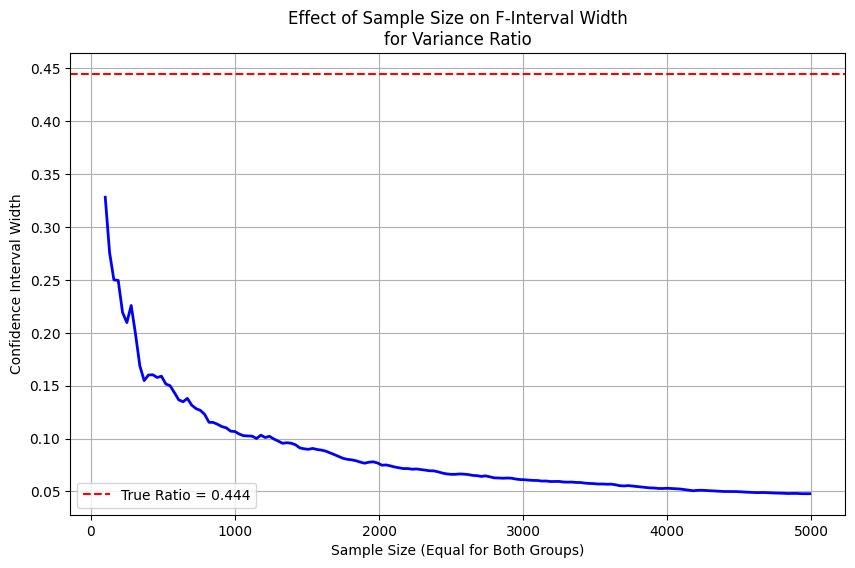

In [21]:
# Set parameters
mean1, std1 = 10, 2  # Population 1 parameters
mean2, std2 = 15, 3  # Population 2 parameters
confidence_level = 0.95
sample_sizes = np.arange(100, 5000, 30)  # Range of sample sizes to test

# Initialize lists to store results
interval_widths = []
sample_size_pairs = []

# Calculate intervals for different sample size combinations
for n in sample_sizes:
    # Generate samples
    np.random.seed(42)  # For reproducibility
    sample1 = np.random.normal(loc=mean1, scale=std1, size=n)
    sample2 = np.random.normal(loc=mean2, scale=std2, size=n)
    
    # Calculate confidence interval
    lower, upper = two_sample_f_interval(sample1, sample2, confidence_level)
    
    # Calculate and store interval width
    width = upper - lower
    interval_widths.append(width)
    sample_size_pairs.append(n)

# Set parameters
mean1, std1 = 10, 2  # Population 1 parameters
mean2, std2 = 15, 3  # Population 2 parameters
confidence_level = 0.95
sample_sizes = np.arange(100, 5000, 30)  # Range of sample sizes to test

# Initialize lists to store results
lower_bounds = []
upper_bounds = []
sample_size_pairs = []

# Calculate intervals for different sample size combinations
for n in sample_sizes:
    # Generate samples
    np.random.seed(42)  # For reproducibility
    sample1 = np.random.normal(loc=mean1, scale=std1, size=n)
    sample2 = np.random.normal(loc=mean2, scale=std2, size=n)
    
    # Calculate confidence interval
    lower, upper = two_sample_f_interval(sample1, sample2, confidence_level)
    
    # Store results
    lower_bounds.append(lower)
    upper_bounds.append(upper)
    sample_size_pairs.append(n)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sample_size_pairs, lower_bounds, 'b--', linewidth=1, label='Lower Bound')
plt.plot(sample_size_pairs, upper_bounds, 'b-', linewidth=1, label='Upper Bound')
plt.fill_between(sample_size_pairs, lower_bounds, upper_bounds, color='blue', alpha=0.2, label='Confidence Interval')

# Add true variance ratio line
true_ratio = (std1 / std2) ** 2
plt.axhline(y=true_ratio, color='r', linestyle='--', label=f'True Ratio = {true_ratio:.3f}')

# Labeling
plt.xlabel('Sample Size (Equal for Both Groups)')
plt.ylabel('Confidence Interval Bounds')
plt.title('Effect of Sample Size on F-Interval Bounds\nfor Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()


# Exercise 7: Simulating the Effect of Variance Ratio on F-Interval Width
- Task: Generate two independent samples with varying variance ratios (e.g., 1:1, 1:2, 1:5) and calculate the F-interval for each. Plot the interval width as a function of the variance ratio.

- Input: Mean, sample size, list of variance ratios, confidence level.

- Output: A plot showing variance ratio on the x-axis and interval width on the y-axis.

- Hint: This helps illustrate the sensitivity of the F-interval to the variance ratio.


- As the degrees of freedom increase for both the numerator and denominator, the F-distribution becomes more concentrated around smaller F-values, with a higher peak and a shorter right tail.

- Lower degrees of freedom create a more skewed distribution with a longer right tail, showing greater variability.


# Exercise 8: Confidence Intervals for Standard Deviations
- Task: Extend your function from Exercise 1 to calculate a confidence interval for the standard deviation of a sample. Use the chi-square distribution to find the interval for the variance, then take the square root.

- Input: A list of sample values, confidence level.

- Output: A tuple representing the lower and upper bounds of the confidence interval for the standard deviation.

- Hint: This is useful in scenarios where the standard deviation is more interpretable than the variance.